In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv('Customer_Actions.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          350 non-null    int64 
 1   Gender           350 non-null    object
 2   Age              350 non-null    int64 
 3   EstimatedSalary  350 non-null    int64 
 4   Purchased        350 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 13.8+ KB


In [4]:
print('Size of dataset :',df.shape)

Size of dataset : (350, 5)


In [5]:
df['Purchased'].value_counts()

0    243
1    107
Name: Purchased, dtype: int64

### 1. Age vs purchasing behaviour

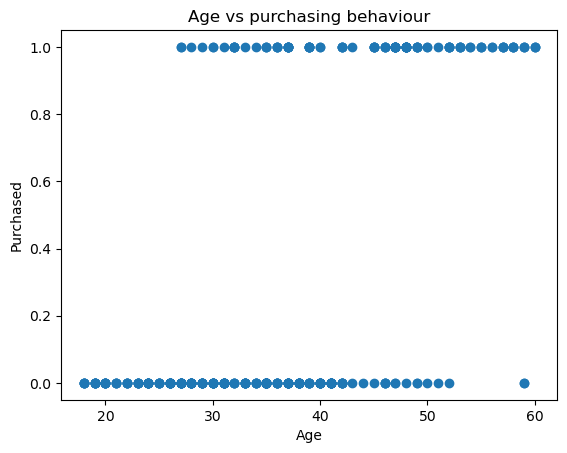

In [6]:
plt.scatter(df['Age'],df['Purchased'])
plt.title('Age vs purchasing behaviour')
plt.xlabel('Age')
plt.ylabel('Purchased')
plt.show()

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
label_encoder=LabelEncoder()
df['Gender_encoded']=label_encoder.fit_transform(df['Gender'])

In [9]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Gender_encoded
0,15624510,Male,19,19000,0,1
1,15810944,Male,35,20000,0,1
2,15668575,Female,26,43000,0,0
3,15603246,Female,27,57000,0,0
4,15804002,Male,19,76000,0,1


In [10]:
x=df[['Gender_encoded','Age','EstimatedSalary']]
y=df['Purchased']

#### Train test split

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [13]:
print('Size of training data : ',x_train.shape[0])
print('Size of test data : ',x_test.shape[0])

Size of training data :  262
Size of test data :  88


### Normalization

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
min_max=MinMaxScaler()
min_max.fit(x_train[['Age','EstimatedSalary']])
train_transformed=min_max.transform(x_train[['Age','EstimatedSalary']])
test_transformed=min_max.transform(x_test[['Age','EstimatedSalary']])
test_transformed

array([[0.21428571, 0.51111111],
       [0.26190476, 0.5037037 ],
       [0.5952381 , 0.87407407],
       [0.11904762, 0.03703704],
       [0.57142857, 0.42962963],
       [0.23809524, 0.12592593],
       [0.02380952, 0.08148148],
       [0.4047619 , 0.44444444],
       [0.0952381 , 0.48888889],
       [0.61904762, 0.17777778],
       [0.71428571, 0.77037037],
       [0.0952381 , 0.35555556],
       [0.45238095, 0.28148148],
       [0.28571429, 0.53333333],
       [0.19047619, 0.        ],
       [0.04761905, 0.4962963 ],
       [0.07142857, 0.39259259],
       [0.42857143, 0.33333333],
       [0.66666667, 0.6       ],
       [0.52380952, 0.31111111],
       [0.54761905, 0.27407407],
       [0.76190476, 0.15555556],
       [0.28571429, 0.25185185],
       [0.35714286, 0.99259259],
       [0.19047619, 0.        ],
       [0.73809524, 0.0962963 ],
       [0.26190476, 0.48148148],
       [0.4047619 , 0.25925926],
       [0.        , 0.27407407],
       [0.11904762, 0.0962963 ],
       [0.

In [16]:
x_train['Age_normalized']=train_transformed[:,0]
x_train['EstimatedSalary_normalized']=train_transformed[:,1]
x_train.head()

,Gender_encoded,Age,EstimatedSalary,Age_normalized,EstimatedSalary_normalized
66,1,24,19000,0.142857,0.029630
126,1,42,65000,0.571429,0.370370
12,1,20,86000,0.047619,0.525926
221,1,35,91000,0.404762,0.562963
316,0,54,104000,0.857143,0.659259


In [17]:
x_test['Age_normalized']=test_transformed[:,0]
x_test['EstimatedSalary_normalized']=test_transformed[:,1]
x_test.head()

,Gender_encoded,Age,EstimatedSalary,Age_normalized,EstimatedSalary_normalized
6,0,27,84000,0.214286,0.511111
52,0,29,83000,0.261905,0.503704
270,0,43,133000,0.595238,0.874074
45,1,23,20000,0.119048,0.037037
296,1,42,73000,0.571429,0.429630


## Fitting logistic regression model 

#### 1. Using age only

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
logic_model=LogisticRegression()
logic_model.fit(x_train[['Age_normalized']],y_train)

LogisticRegression()

In [20]:
predictions=logic_model.predict(x_test[['Age_normalized']])
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0],
      dtype=int64)

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
print('Test accuracy :',logic_model.score(x_test[['Age_normalized']],y_test))

Test accuracy : 0.8295454545454546


In [23]:
train_predictions=logic_model.predict(x_train[['Age_normalized']])
print('Training accuracy :',logic_model.score(x_train[['Age_normalized']],y_train))

Training accuracy : 0.8282442748091603


### Model 2. Using all normalized and encoded features

In [24]:
logic_model2=LogisticRegression()
logic_model2.fit(x_train[['Gender_encoded','Age_normalized','EstimatedSalary_normalized']],y_train)

LogisticRegression()

In [25]:
predictions=logic_model2.predict(x_test[['Gender_encoded','Age_normalized','EstimatedSalary_normalized']])
predictions

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1],
      dtype=int64)

In [26]:
print('Test accuracy :',logic_model2.score(x_test[['Gender_encoded','Age_normalized','EstimatedSalary_normalized']],y_test))

Test accuracy : 0.8409090909090909


In [27]:
train_predictions=logic_model2.predict(x_train[['Gender_encoded','Age_normalized','EstimatedSalary_normalized']])
print('Training accuracy :',logic_model2.score(x_train[['Gender_encoded','Age_normalized','EstimatedSalary_normalized']],y_train))

Training accuracy : 0.8549618320610687


## Getting probabilities

In [28]:
x_test[['Gender_encoded','Age_normalized','EstimatedSalary_normalized']]

,Gender_encoded,Age_normalized,EstimatedSalary_normalized
6,0,0.214286,0.511111
52,0,0.261905,0.503704
270,0,0.595238,0.874074
45,1,0.119048,0.037037
296,1,0.571429,0.429630
...,...,...,...
22,1,0.714286,0.192593
261,1,0.428571,0.955556
238,0,0.666667,0.496296
140,1,0.023810,0.518519


In [29]:
x_test[['Gender_encoded','Age_normalized','EstimatedSalary_normalized']].iloc[0,:]

Gender_encoded                0.000000
Age_normalized                0.214286
EstimatedSalary_normalized    0.511111
Name: 6, dtype: float64

In [30]:
logic_model2.predict_proba(x_test[['Gender_encoded','Age_normalized','EstimatedSalary_normalized']].iloc[0,:].values.reshape(1,-1))

C:\Users\Sai\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.83872664, 0.16127336]])

In [31]:
pred_probs=logic_model2.predict_proba(x_test[['Gender_encoded','Age_normalized','EstimatedSalary_normalized']])
pred_probs

array([[0.83872664, 0.16127336],
       [0.81245368, 0.18754632],
       [0.24197868, 0.75802132],
       [0.97502973, 0.02497027],
       [0.61581155, 0.38418845],
       [0.94633917, 0.05366083],
       [0.97864689, 0.02135311],
       [0.75885279, 0.24114721],
       [0.91261066, 0.08738934],
       [0.7203495 , 0.2796505 ],
       [0.20904681, 0.79095319],
       [0.93422229, 0.06577771],
       [0.81048239, 0.18951761],
       [0.799286  , 0.200714  ],
       [0.96988747, 0.03011253],
       [0.91808548, 0.08191452],
       [0.93338676, 0.06661324],
       [0.80107261, 0.19892739],
       [0.35697842, 0.64302158],
       [0.7409322 , 0.2590678 ],
       [0.74351836, 0.25648164],
       [0.59819337, 0.40180663],
       [0.90615763, 0.09384237],
       [0.38118745, 0.61881255],
       [0.96643616, 0.03356384],
       [0.68987213, 0.31012787],
       [0.83862518, 0.16137482],
       [0.84930192, 0.15069808],
       [0.96875132, 0.03124868],
       [0.96663243, 0.03336757],
       [0.

## Log loss

In [32]:
from sklearn.metrics import log_loss

In [33]:
print('Model log loss :',log_loss(y_test,pred_probs))

Model log loss : 0.3601701972105401


## ROC-AUC curve

In [34]:
from sklearn.metrics import roc_curve,roc_auc_score

In [35]:
pred_probs[:,1]

array([0.16127336, 0.18754632, 0.75802132, 0.02497027, 0.38418845,
       0.05366083, 0.02135311, 0.24114721, 0.08738934, 0.2796505 ,
       0.79095319, 0.06577771, 0.18951761, 0.200714  , 0.03011253,
       0.08191452, 0.06661324, 0.19892739, 0.64302158, 0.2590678 ,
       0.25648164, 0.40180663, 0.09384237, 0.61881255, 0.03356384,
       0.31012787, 0.16137482, 0.15069808, 0.03124868, 0.03336757,
       0.83546602, 0.03723138, 0.09493369, 0.42344633, 0.0669915 ,
       0.1587419 , 0.66132071, 0.18904298, 0.18605878, 0.20562541,
       0.85086732, 0.08300999, 0.12377856, 0.68766929, 0.49428511,
       0.25218095, 0.09616662, 0.87450723, 0.09230584, 0.19678214,
       0.09781623, 0.23800616, 0.23300402, 0.59983806, 0.06440491,
       0.90956177, 0.1803418 , 0.85833821, 0.05818785, 0.40988971,
       0.44732925, 0.68365548, 0.05215135, 0.9062876 , 0.09088885,
       0.0524521 , 0.04218471, 0.28266159, 0.94840548, 0.39973589,
       0.63242492, 0.91722739, 0.29550026, 0.40034907, 0.06522

In [36]:
fpr,tpr,thresholds=roc_curve(y_test,pred_probs[:,1])
fpr,tpr,thresholds

(array([0.        , 0.        , 0.        , 0.01587302, 0.01587302,
        0.03174603, 0.03174603, 0.06349206, 0.06349206, 0.07936508,
        0.07936508, 0.15873016, 0.15873016, 0.17460317, 0.17460317,
        0.23809524, 0.23809524, 0.36507937, 0.36507937, 1.        ]),
 array([0.  , 0.04, 0.32, 0.32, 0.36, 0.36, 0.44, 0.44, 0.6 , 0.6 , 0.64,
        0.64, 0.76, 0.76, 0.92, 0.92, 0.96, 0.96, 1.  , 1.  ]),
 array([1.94840548, 0.94840548, 0.85086732, 0.83546602, 0.79095319,
        0.75802132, 0.68365548, 0.64302158, 0.59983806, 0.56516982,
        0.56401781, 0.40988971, 0.39973589, 0.38921105, 0.31012787,
        0.2590678 , 0.25790479, 0.21282621, 0.20562541, 0.02135311]))

In [37]:
print('Model AUC:',roc_auc_score(y_test,pred_probs[:,1]))

Model AUC: 0.9123809523809523


## Plotting ROC

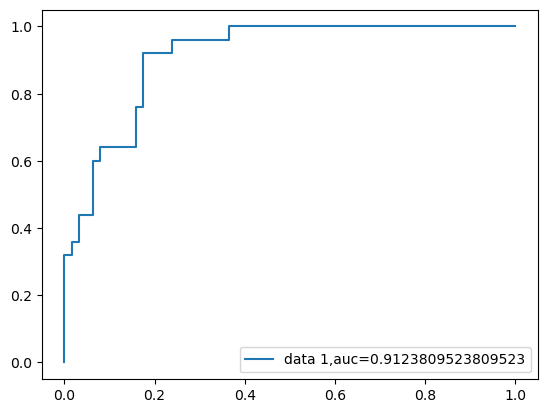

In [38]:
fpr,tpr,_=roc_curve(y_test,pred_probs[:,1])
auc=roc_auc_score(y_test,pred_probs[:,1])
plt.plot(fpr,tpr,label='data 1,auc='+str(auc))
plt.legend(loc=4)
plt.show()